# Explore here

In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

url = "/workspaces/Naive_Bayes_PereHDZ/reviews.csv"

df = pd.read_csv(url, sep=',')

df.to_csv('reviews.csv', index=False)

df.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [154]:
#Check the number of rows and columns
df.shape

(891, 3)

In [155]:
#Since 'package_name' is irrelevant in determining wether a comment is negative or not, we will remove it
df = df.drop(columns=['package_name'])

df.head()

,review,polarity
0,privacy at least put some option appear offli...,0
1,"messenger issues ever since the last update, ...",0
2,profile any time my wife or anybody has more ...,0
3,the new features suck for those of us who don...,0
4,forced reload on uploading pic on replying co...,0


In [156]:
#check for duplicates
df.duplicated().sum()

#There are no duplicates

np.int64(0)

In [157]:
#Check for empty elements in the dataset
df.isnull().mean()*100

#There are no missing elements

review      0.0
polarity    0.0
dtype: float64

In [158]:
#Data split
X = df['review']
y = df['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Vectorize data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

vectorizer.get_feature_names_out()

array(['000', '04', '0x', ..., 'žŕ', 'žŕľ', 'ˇŕ'],
      shape=(3553,), dtype=object)

In [159]:
X_test_vec.toarray().shape

(179, 3553)

In [160]:
def get_word_counts(X_test_vec, vectorizer, row_index=1):
    words = []
    counts = []
    
    for i, count in enumerate(X_test_vec.toarray()[row_index]):  # Use specified row
        if count != 0:
            words.append(vectorizer.get_feature_names_out()[i])
            counts.append(count)
    
    df = pd.DataFrame({'word': words, 'count': counts})
    return df

XWordcount = get_word_counts(X_test_vec, vectorizer)

XWordcount

,word,count
0,all,1
1,app,1
2,away,1
3,basically,1
4,family,1
5,friends,1
6,gone,1
7,has,1
8,helps,1
9,in,1


In [161]:
#Initialize and train the Multinomial Naive Bayes classificator
clf = MultinomialNB().fit(X_train_vec, y_train)

#Make predictions on test
y_pred = clf.predict(X_test_vec)

#Evaluate the model
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       126
           1       0.84      0.58      0.69        53

    accuracy                           0.84       179
   macro avg       0.84      0.77      0.79       179
weighted avg       0.84      0.84      0.83       179



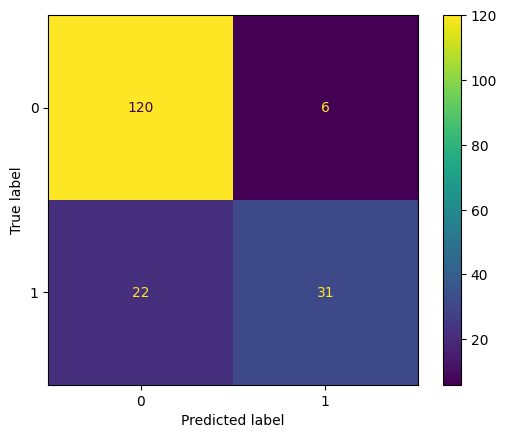

In [162]:
#Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()

From the classification report and the confusion matrix, we can inferr the following:
- Class 0 is well predicted (High precision (85%) and recall (95%)).
- Class 1 has low recall (58%), meaning many actual class 1 instances were misclassified as class 0. This is likely due to class imbalance (there are more instances of class 0 (126 vs. 53)), so our model tends towards predicting class 0 more often.
- Precission is around 84-85% in all cases, so the model is fairly robust, though it needs improvement in order to minimize class imbalance. A way to do it would be to eliminate some comments with polarity 0 or adding more with polarity 1.
